# Three Layers Neural Network (MNIST DataSet)

In [40]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelBinarizer

filename = "DataSets\MNIST_train.csv"

In [31]:
# Loading and Preprocessing the data
def preprocessing(filename):
    dataset = pd.read_csv(filename, header=0)
    data = dataset.values
    x = data[:,1:] / 255 # Normalize each pixels to Grayscale 0 to 1
    y = data[:,0]
    
    lb = LabelBinarizer()
    lb.fit(y)
    y = lb.transform(y)
    
    return x, y

In [32]:
# Loading the dataset
trainX, trainY = preprocessing(filename)

In [33]:
# Select only 1000 images
trainX = trainX[:1000]

In [34]:
# Nonlinear Function
def relu(inputs):
    return (inputs > 0) * inputs

# Direvative of the Nonlinear function
def relu2Direvative(output):
    return (output > 0)

In [42]:
# Neural Network Function
def NeuralNetwork(train, labels):
    
    np.random.seed(1) # Setting the random seed
    
    alpha = 0.05
    iterations = 100
    input_nodes = train.shape[1] # Image Pixels
    hidden_nodes = 40
    output_nodes = 10 # 0 to 9 Numbers
    
    weights_0_1 = 0.2 * np.random.random((input_nodes, hidden_nodes)) - 0.1
    weights_1_2 = 0.2 * np.random.random((hidden_nodes, output_nodes)) - 0.1
    
    errors = []
    
    for iteration in range(iterations):
        
        error = 0.0
        correct_cnt = 0
        for i in range(train.shape[0]):
            
            layer_0 = train[i:i+1]
            layer_1 = relu(layer_0.dot(weights_0_1))
            layer_2 = layer_1.dot(weights_1_2)
            
            error += np.sum((layer_2 - labels[i:i+1]) ** 2)
            correct_cnt += int(np.argmax(layer_2)) == np.argmax(labels[i:i+1])
            
            layer_2_delta = layer_2 - labels[i:i+1]
            layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2Direvative(layer_1)
            
            weights_1_2 -= layer_1.T.dot(layer_2_delta) * alpha
            weights_0_1 -= layer_0.T.dot(layer_1_delta) * alpha
        
        errors.append(error)
        sys.stdout.write("\r" + "Iteration: " + str(iteration) + " Error: " + str(error) + " Correct Count: " + str(correct_cnt))
        
    return errors

In [43]:
# Plotting Function
def plot(data):
    ax = plt.figure(figsize=(10,6))
    ax.suptitle("Error Plot", fontsize=20)
    plt.plot(data)
    plt.xlabel("Iteration", fontsize=15)
    plt.ylabel("Error", fontsize=15)
    plt.show()

In [38]:
# Call Neural Network Function
errors = NeuralNetwork(trainX, trainY)

Iteration: 99 Error: 10.9956578689 Correct Count: 993

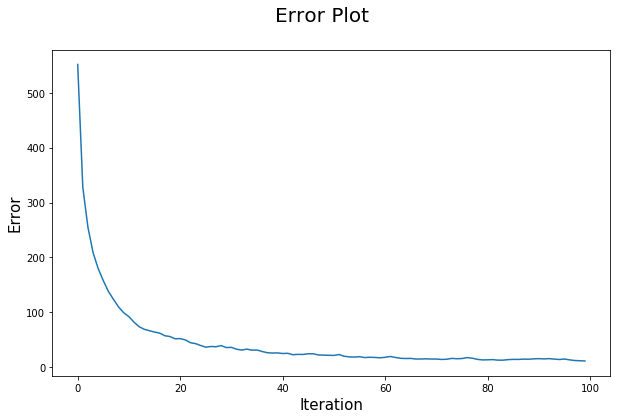

In [41]:
# Plotting Error Curve
plot(errors)